In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Crop_recommendation.csv")

# Display the first few rows
df.head()






,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("Crop_recommendation.csv")

# Simulate crop failure: assume yield < threshold for some crops = failure (binary label)
import numpy as np
df['failure'] = np.where((df['rainfall'] < 60) | (df['ph'] < 5.5) | (df['humidity'] < 45), 1, 0)

# Features and label
X = df.drop(['label', 'failure'], axis=1)
y = df['failure']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)


In [5]:
# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


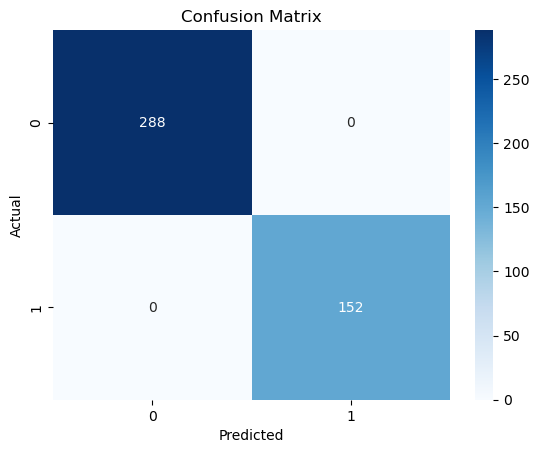

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:

#CHECKING OVERFITTING



# 9. Now evaluate TRAINING performance
train_acc = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Train F1-score: {train_f1:.2f}")


Train Accuracy: 1.00
Train F1-score: 1.00


In [12]:
#evaluating  performance on the test set
# Predict on test set
y_test_pred = clf.predict(X_test)

# Evaluate TESTING performance
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test F1-score: {test_f1:.2f}")


Test Accuracy: 1.00
Test F1-score: 1.00
